In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob

In [37]:
# Extract path from the male and female in crop data folder and put in a list
male_paths = glob('crop_data/male/*.jpg')
female_paths = glob('crop_data/female/*.jpg')

print(len(male_paths), len(female_paths))

5399 4762


In [38]:
df_female = pd.DataFrame(female_paths, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(male_paths, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis = 0)
df

,filepath,gender
0,crop_data/female\female_0.jpg,female
1,crop_data/female\female_1.jpg,female
2,crop_data/female\female_10.jpg,female
3,crop_data/female\female_100.jpg,female
4,crop_data/female\female_1000.jpg,female
...,...,...
5394,crop_data/male\male_995.jpg,male
5395,crop_data/male\male_996.jpg,male
5396,crop_data/male\male_997.jpg,male
5397,crop_data/male\male_998.jpg,male


In [39]:
df.shape

(10161, 2)

In [40]:
## Add a column for size of the image
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

df['size'] = df['filepath'].apply(get_size) ## get size of the image
df

,filepath,gender,size
0,crop_data/female\female_0.jpg,female,273
1,crop_data/female\female_1.jpg,female,182
2,crop_data/female\female_10.jpg,female,273
3,crop_data/female\female_100.jpg,female,122
4,crop_data/female\female_1000.jpg,female,273
...,...,...,...
5394,crop_data/male\male_995.jpg,male,273
5395,crop_data/male\male_996.jpg,male,54
5396,crop_data/male\male_997.jpg,male,122
5397,crop_data/male\male_998.jpg,male,81


# Exploratory Data Analysis

## Distribution between female and male

<Axes: ylabel='count'>

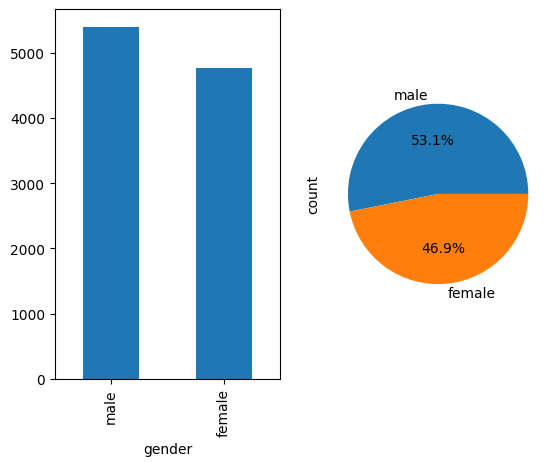

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dist_gender = df['gender'].value_counts()
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1], autopct='%0.1f%%')

<Axes: ylabel='size'>

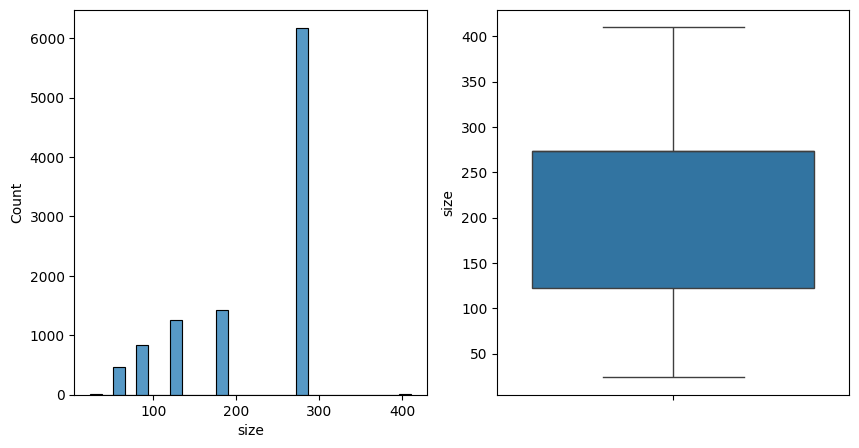

In [42]:
# Size 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df['size'])
plt.subplot(1,2,2)
sns.boxplot(df['size'])

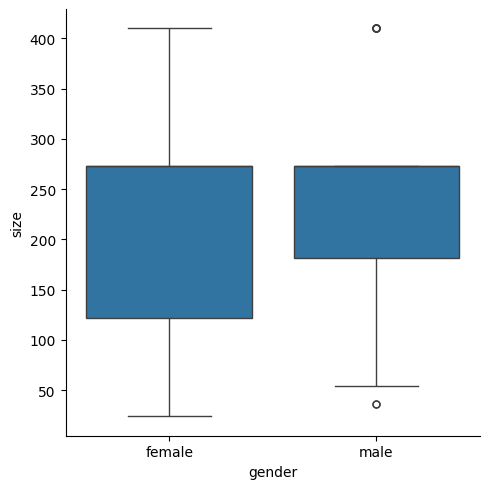

In [43]:
sns.catplot(data=df, x='gender', y='size', kind='box')

1. we have almost equal distribution of gender
2. most of the images are having a size higher than 60
3. most of the females images are hd

- **consider the image with dimensions more than 60**
- **resize all the images into 100x100**

In [44]:
df_filter = df.query('size > 60')
df_filter.shape

(9690, 3)

In [45]:
df_filter['gender'].value_counts(normalize=True)

gender
male      0.532508
female    0.467492
Name: proportion, dtype: float64

In [46]:
def structuring(path):
    try:
        # read image
        img = cv2.imread(path)
        # convert to gray scale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # get size of image
        size = gray.shape[0]
        # resize image
        if size >= 100:
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_AREA)
        else :
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_CUBIC)

        # flatten image
        gray_resize = gray_resize.flatten()

        return gray_resize
    except Exception as e:
        print(path, e)
        return None



In [47]:
df_filter['data'] = df_filter['filepath'].apply(structuring) ## convert all images into 100x100

C:\Users\Lucas\AppData\Local\Temp\ipykernel_18724\3499525963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['data'] = df_filter['filepath'].apply(structuring) ## convert all images into 100x100


In [48]:
df_filter.head()

,filepath,gender,size,data
0,crop_data/female\female_0.jpg,female,273,"[185, 182, 183, 185, 175, 180, 188, 183, 211, ..."
1,crop_data/female\female_1.jpg,female,182,"[33, 24, 31, 29, 28, 30, 29, 33, 35, 32, 47, 8..."
2,crop_data/female\female_10.jpg,female,273,"[185, 182, 183, 185, 175, 180, 188, 183, 211, ..."
3,crop_data/female\female_100.jpg,female,122,"[50, 49, 35, 34, 42, 40, 36, 40, 68, 60, 46, 4..."
4,crop_data/female\female_1000.jpg,female,273,"[185, 182, 183, 185, 175, 180, 188, 183, 211, ..."


In [49]:
data = df_filter['data'].apply(pd.Series)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
1,33,24,31,29,28,30,29,33,35,32,...,56,47,30,35,23,27,27,36,53,18
2,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
3,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
4,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111


In [50]:
data.columns = [f'pixel_{i}' for i in data.columns]
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
1,33,24,31,29,28,30,29,33,35,32,...,56,47,30,35,23,27,27,36,53,18
2,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111
3,50,49,35,34,42,40,36,40,68,60,...,208,227,228,235,237,231,222,215,212,210
4,185,182,183,185,175,180,188,183,211,215,...,109,111,115,117,121,116,118,118,117,111


## Data Normalization

In [51]:
data = data/255.0
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.427451,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294
1,0.129412,0.094118,0.121569,0.113725,0.109804,0.117647,0.113725,0.129412,0.137255,0.125490,...,0.219608,0.184314,0.117647,0.137255,0.090196,0.105882,0.105882,0.141176,0.207843,0.070588
2,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.427451,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294
3,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.815686,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529
4,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.427451,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294


In [52]:
data['gender'] = df_filter['gender']
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
1,0.129412,0.094118,0.121569,0.113725,0.109804,0.117647,0.113725,0.129412,0.137255,0.125490,...,0.184314,0.117647,0.137255,0.090196,0.105882,0.105882,0.141176,0.207843,0.070588,female
2,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female
3,0.196078,0.192157,0.137255,0.133333,0.164706,0.156863,0.141176,0.156863,0.266667,0.235294,...,0.890196,0.894118,0.921569,0.929412,0.905882,0.870588,0.843137,0.831373,0.823529,female
4,0.725490,0.713725,0.717647,0.725490,0.686275,0.705882,0.737255,0.717647,0.827451,0.843137,...,0.435294,0.450980,0.458824,0.474510,0.454902,0.462745,0.462745,0.458824,0.435294,female


In [54]:
## count the number of null values
data.isnull().sum().sum()

0

In [56]:
## remove null values
data = data.dropna()
data.shape

(9690, 10001)

In [57]:
import pickle

pickle.dump(data, open('data/data_images_100_100.pickle', 'wb'))